In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)


### Данные и визуализация

In [2]:
df = pd.read_csv("merged_data.csv")
df["date"] = pd.to_datetime(df.date, format="%Y%m%d")
for i in df['ticker'].unique():
    current_df = df[df['ticker'] == i]
    # current_df[current_df.log_return > current_df.log_return.quantile(.95)] = current_df.log_return
    q1 = current_df.log_return.quantile(0.25)
    q3 = current_df.log_return.quantile(0.75)
    iqr = q3 - q1
    out_low = q1 - 15 * iqr
    out_high = q3 + 15 * iqr
    # current_df = current_df.fillna(current_df.log_return)
    # print(f'Series {i} have {sum((current_df.log_return < out_low) | (current_df.log_return > out_high))/ len(current_df.log_return) * 100} % otliers')
    # current_df.log_return.loc[(current_df.log_return < out_low) | (current_df.log_return > out_high)] = np.median(current_df.log_return)
    current_df.log_return.loc[(current_df.log_return < out_low) | (current_df.log_return > out_high)] = np.nan
    current_df.interpolate(method='linear', limit_direction='forward')

    df[df['ticker'] == i] = current_df 


/var/folders/pp/702t61x54ds41t8xnk54p6kr0000gn/T/ipykernel_23740/2703479518.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  current_df.interpolate(method='linear', limit_direction='forward')
/var/folders/pp/702t61x54ds41t8xnk54p6kr0000gn/T/ipykernel_23740/2703479518.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  current_df.interpolate(method='linear', limit_direction='forward')
/var/folders/pp/702t61x54ds41t8xnk54p6kr0000gn/T/ipykernel_23740/2703479518.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  current_df.interpolate(method='linear', limit_direction='forward')
/var/folders/pp/702t61x54ds41t8xnk

In [3]:
def plot_log_returns(df, tickers):
    ncols = 2
    nrows = len(tickers) // ncols if len(tickers) % ncols == 0 else len(tickers) // ncols + 1
    _, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7))
    for idx, ticker in enumerate(tickers):
        returns = df.loc[df.ticker == ticker, ["date", "log_return"]]
        cur_ax = ax[idx // ncols][idx % ncols]
        sns.lineplot(data=returns, x="date", y="log_return", ax=cur_ax)
        cur_ax.set_title(ticker)
    plt.tight_layout()

In [4]:
# print(*np.sort(df['ticker'].unique()), sep = '\n')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

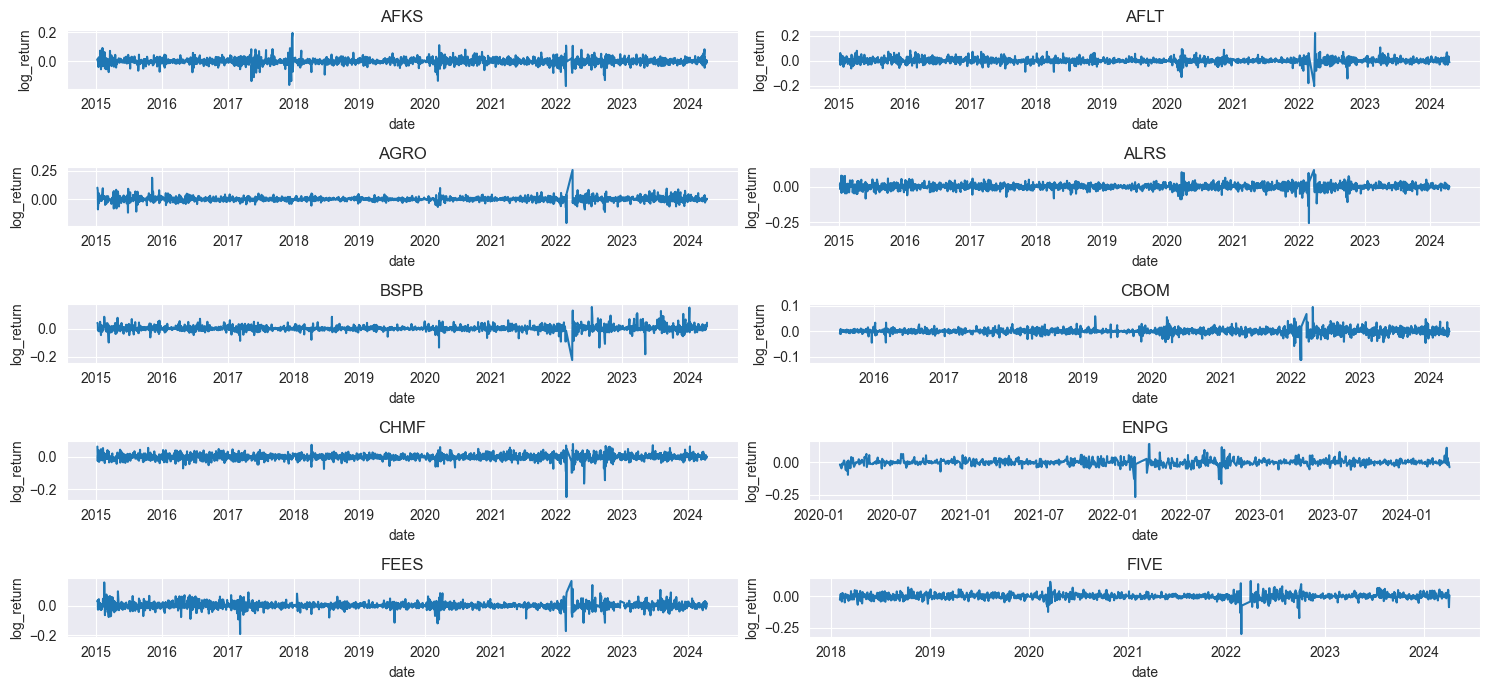

In [5]:
tickers = df.ticker.unique()
plot_log_returns(df, tickers[:10])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

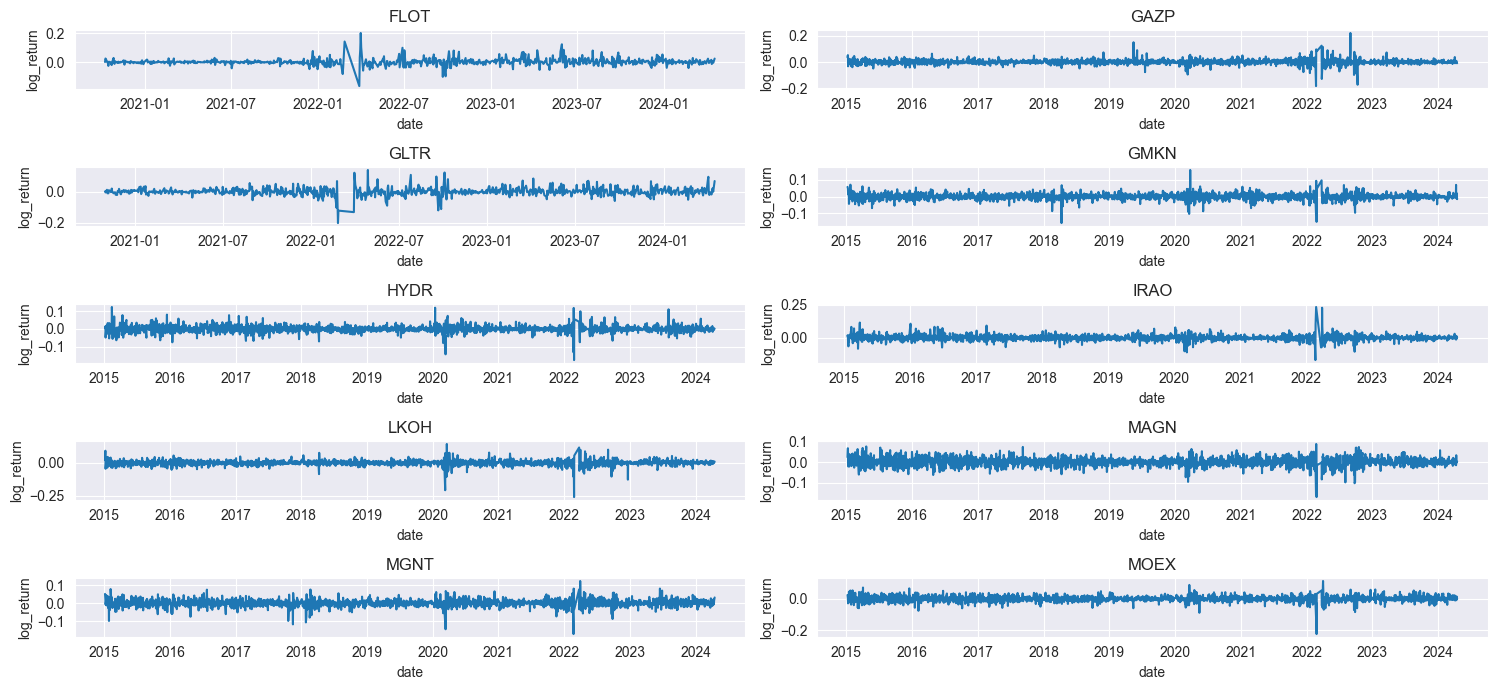

In [6]:
plot_log_returns(df, tickers[10:20])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

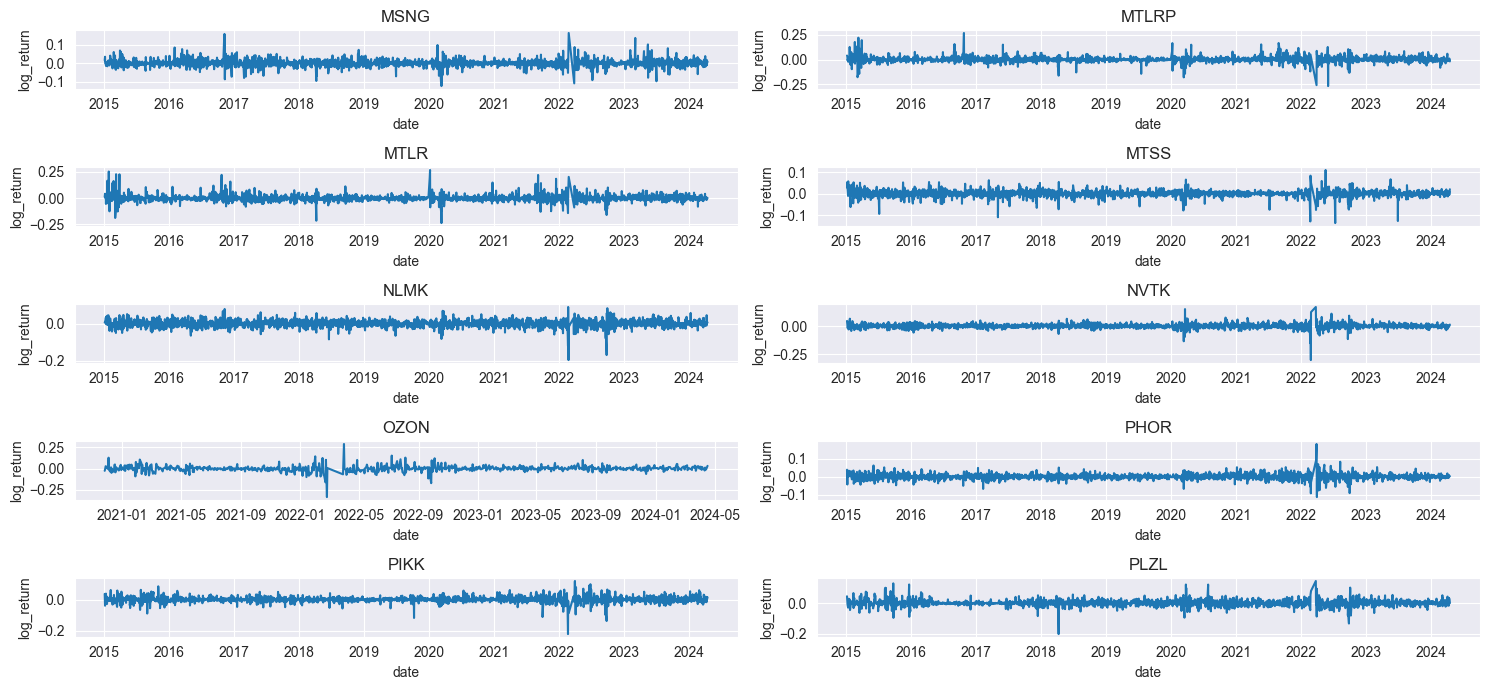

In [7]:
plot_log_returns(df, tickers[20:30])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

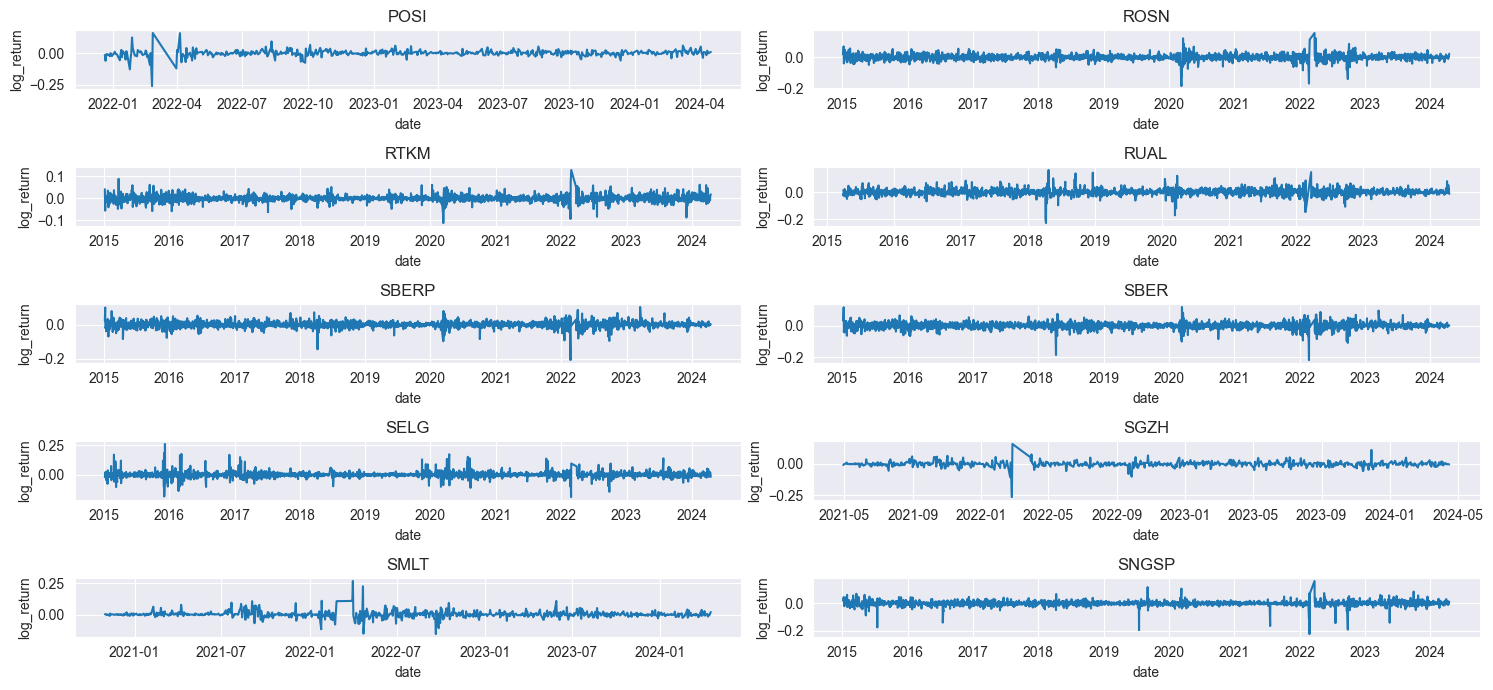

In [8]:
plot_log_returns(df, tickers[30:40])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

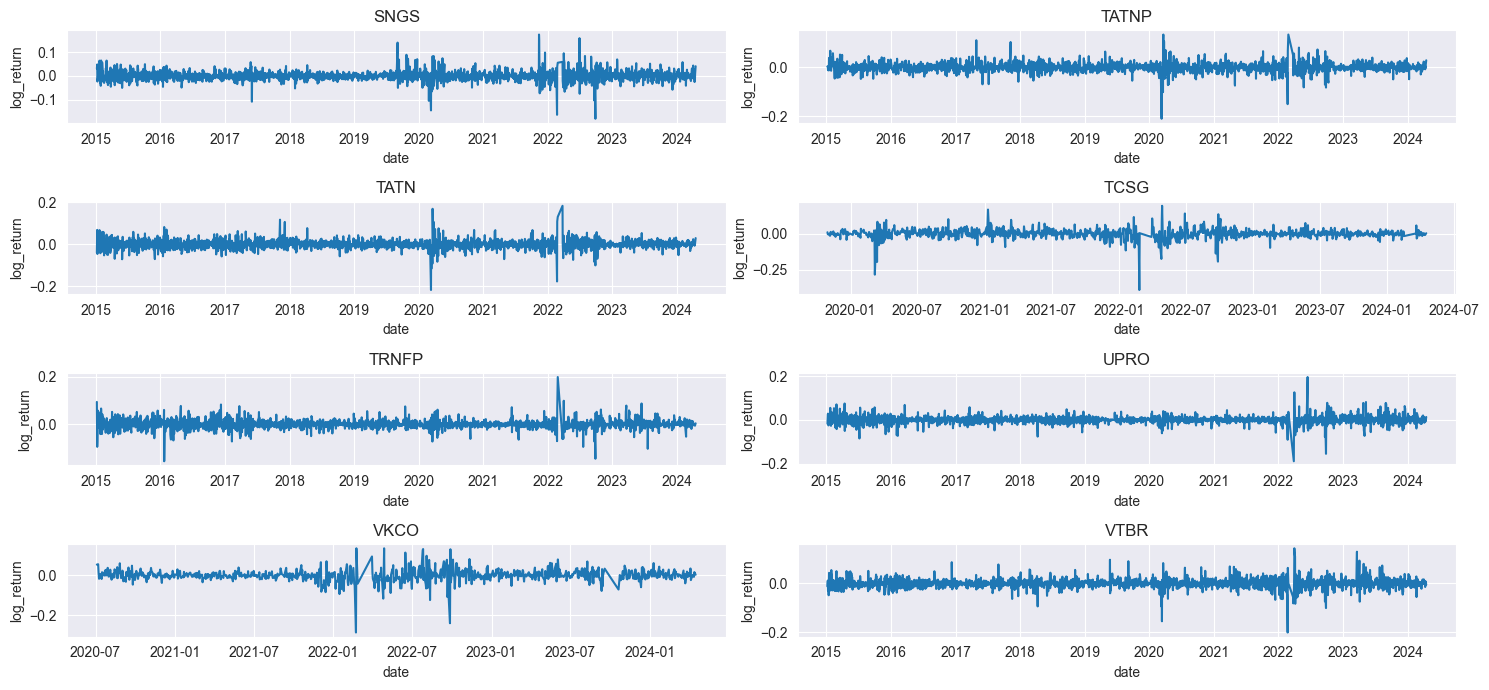

In [9]:
plot_log_returns(df, tickers[40:])